# ARIMA Model

In [1]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2013-01-01')

# Selecting the 'Close' column for prediction
mydata = df['Close'].values
res = adfuller( mydata.dropna())  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

<AxesSubplot:xlabel='Date'>

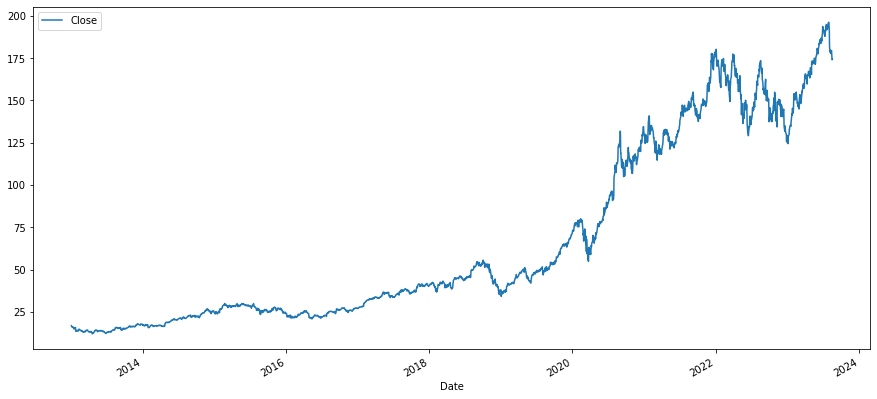

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf


# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2013-01-01')
df.head()

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df.index)  # Assuming 'Date' is the index

# Extract 'Date' and 'Close' columns into a new DataFrame
df = df[['Date', 'Close']].copy()
df.head()
df.describe()
df.set_index('Date',inplace=True)
# index = pd.DatetimeIndex(df.index).date


from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['Close'])

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Close'])

ADF Test Statistic : 0.3869880164008559
p-value : 0.9810017650877887
#Lags Used : 26
Number of Observations : 2649
weak evidence against null hypothesis,indicating it is non-stationary 


In [5]:
df['First Difference'] = df['Close'] - df['Close'].shift(1)
# df['Close Price Second Difference']=df['Close']-df['Close'].shift(2)

# Again testing if data is stationary
adfuller_test(df['First Difference'].dropna())

ADF Test Statistic : -10.374843390532556
p-value : 2.215363658219997e-18
#Lags Used : 25
Number of Observations : 2649
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:xlabel='Date'>

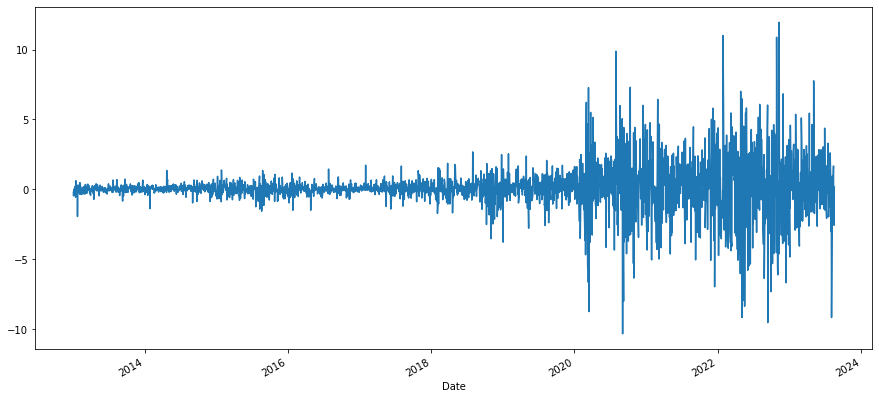

In [6]:
df['First Difference'].plot()

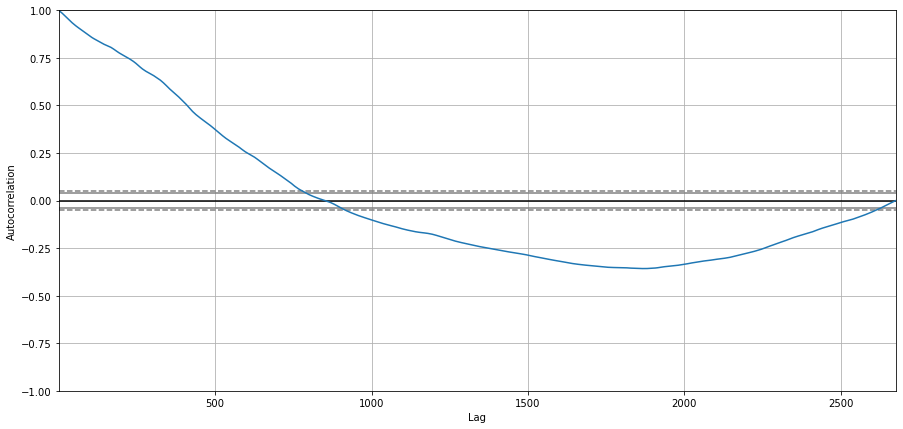

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


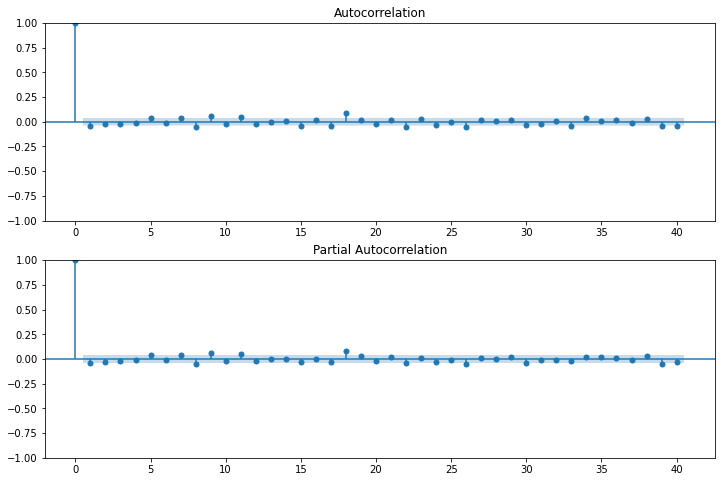

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First Difference'].dropna(),lags=40,ax=ax2)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2676
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5070.568
Date:                Fri, 18 Aug 2023   AIC                          10147.135
Time:                        21:28:20   BIC                          10164.810
Sample:                             0   HQIC                         10153.530
                               - 2676                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4175      0.166      2.510      0.012       0.091       0.743
ma.L1         -0.4647      0.163     -2.846      0.004      -0.785      -0.145
sigma2         2.5939      0.031     83.629      0.000       2.533       2.655
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8645.94
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              60.97   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Assuming your index is as shown
index = pd.DatetimeIndex(df.index)

# Extract the date part of the index
date_only_index = index.date

# Print the extracted date-only index
print(date_only_index)

[datetime.date(2013, 1, 2) datetime.date(2013, 1, 3)
 datetime.date(2013, 1, 4) ... datetime.date(2023, 8, 16)
 datetime.date(2023, 8, 17) datetime.date(2023, 8, 18)]


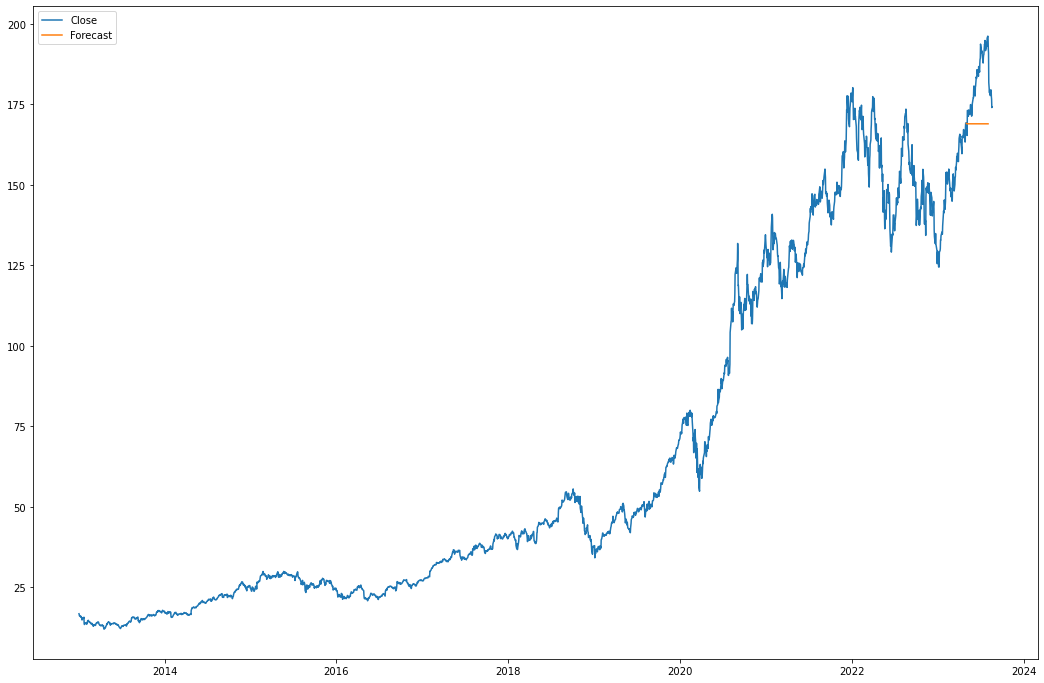

In [14]:
# Assuming your DataFrame is named df
start_date = '2023-05-01'
end_date = '2023-08-01'

forecast_start = df.index.get_loc(start_date)
forecast_end = df.index.get_loc(end_date)

# Generate the forecast
forecast_values = model_fit.predict(start=forecast_start, end=forecast_end, dynamic=True)

# Set the forecasts in the "forecast" column with the appropriate index
df.loc[start_date:end_date, 'forecast'] = forecast_values

# Reset the index of the forecast series
# forecast = pd.Series(forecast, index=np.arange(forecast_start, forecast_end+1))

# Plot 'Close' and 'forecast'
plt.figure(figsize=(18, 12))
plt.plot(df['Close'], label='Close')
plt.plot(df['forecast'], label='Forecast')  # Use df['forecast'] here
plt.legend()
plt.show()

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


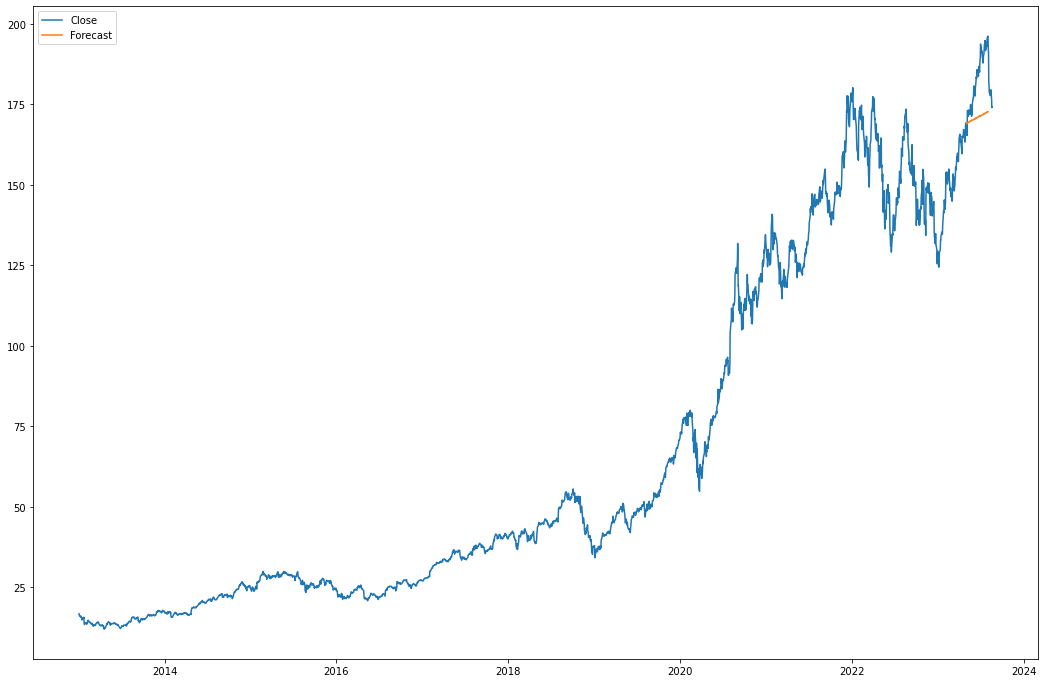

In [15]:
import statsmodels.api as sm

# Assuming your DataFrame is named df
model = sm.tsa.statespace.SARIMAX(df['Close'], order=(1, 1, 2), seasonal_order=(1, 1, 2, 12))
results = model.fit()

# Generate forecasts using the forecast method
forecast_values = results.get_prediction(start=forecast_start, end=forecast_end, dynamic=True)

# Create a new DataFrame for the forecasts
forecast_df = pd.DataFrame({'Close': forecast_values.predicted_mean})
forecast_df.index = df.index[forecast_start:forecast_end+1]

# Plot 'Close' and 'forecast'
plt.figure(figsize=(18, 12))
plt.plot(df['Close'], label='Close')
plt.plot(forecast_df['Close'], label='Forecast')
plt.legend()
plt.show()


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


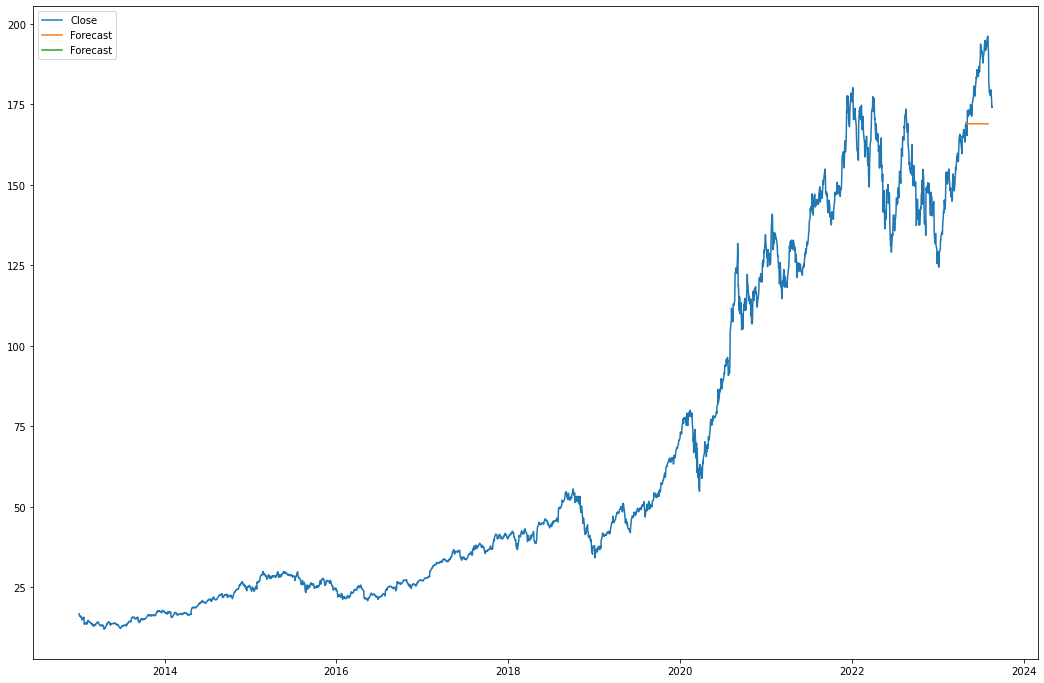

In [16]:
from pandas.tseries.offsets import DateOffset

# Create future dates
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(1, 25)]  # Start from 1 to exclude the last date
future_datest_df = pd.DataFrame(index=future_dates, columns=df.columns)

# Concatenate the original DataFrame with the future dates DataFrame
future_df = pd.concat([df, future_datest_df])

# Generate forecasts for future dates
forecast_start = len(df)  # Use the length of the original DataFrame as the starting index
forecast_end = len(future_df) - 1  # Use the last index of the concatenated DataFrame as the ending index
forecast_values = results.predict(start=forecast_start, end=forecast_end, dynamic=True)

# Create a new DataFrame with the forecasted values and appropriate index
forecast_df = pd.DataFrame(index=future_df.index, columns=['forecast'])
forecast_df['forecast'] = forecast_values

# Concatenate the forecasted DataFrame with the original and future dates DataFrame
combined_df = pd.concat([future_df, forecast_df], axis=1)

# Plot 'Sales' and 'forecast'
plt.figure(figsize=(18, 12))
plt.plot(combined_df['Close'], label='Close')
plt.plot(combined_df['forecast'], label='Forecast')
plt.legend()
plt.show()


# New model 2

Total samples :  1417


<AxesSubplot:xlabel='Date'>

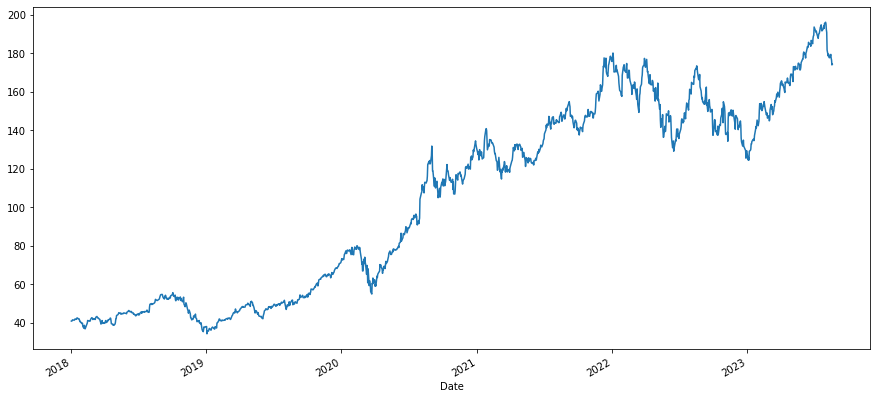

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import joblib

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2018-01-01')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df.index)  # Assuming 'Date' is the index
df['Date'] = df['Date'].dt.date

# Selecting the 'Close' column for prediction
df_2 = df[['Date', 'Close']].copy()
df = df['Close']
df.describe()
# df.set_index('Date',inplace=True)
print('Total samples : ', len(df))
df.head()

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

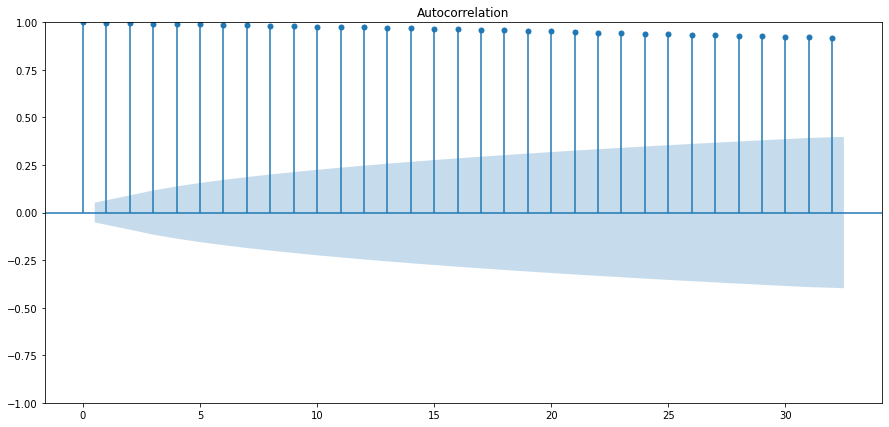

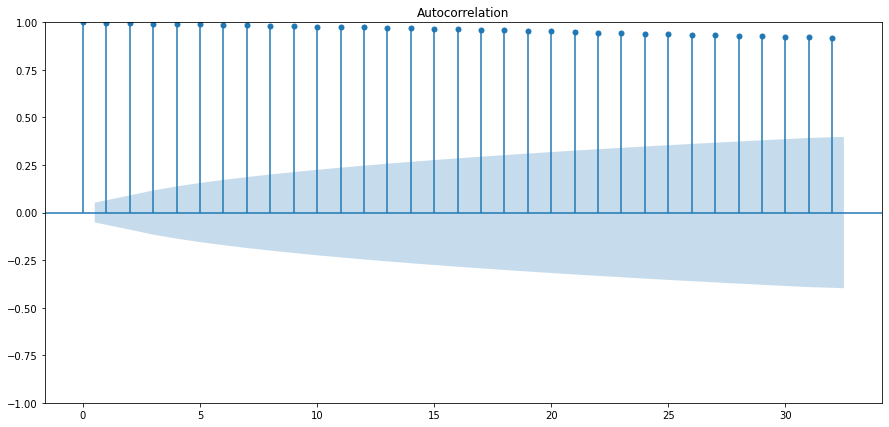

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.values)

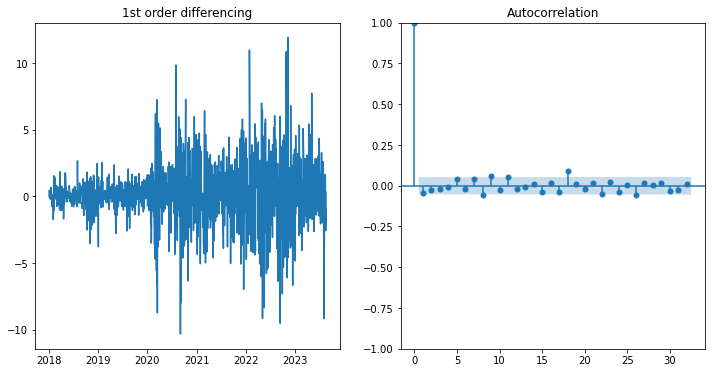

In [19]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import joblib

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2018-01-01')

# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(df.values, columns=df.columns, index=df.index)

# Now you can use the diff() method on the DataFrame
df_diff = df.diff()


f = plt.figure(figsize=(12, 6))
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df['Close'].diff())

ax2 = f.add_subplot(122)
plot_acf(df['Close'].diff().dropna(), ax=ax2)
plt.show()

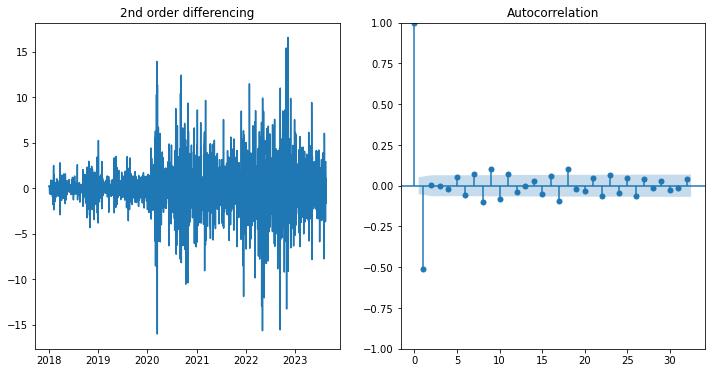

In [20]:
f = plt.figure(figsize=(12, 6))
ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df['Close'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'].dropna())
print('p-value : ', result[1])

result = adfuller(df['Close'].diff().dropna())
print('p-value : ', result[1])

result = adfuller(df['Close'].diff().diff().dropna())
print('p-value : ', result[1])

p-value :  0.8420677825583907
p-value :  6.680040705491048e-19
p-value :  2.096308219353083e-27


# pacf

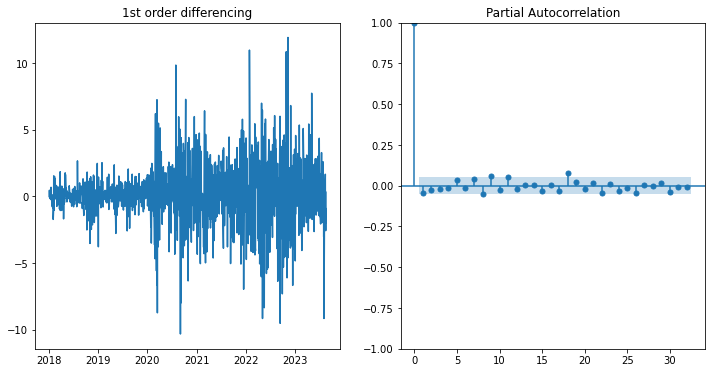

In [22]:
f = plt.figure(figsize=(12, 6))
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df['Close'].diff())

ax2 = f.add_subplot(122)
plot_pacf(df['Close'].diff().dropna(), ax=ax2, method='ywm')
plt.show()

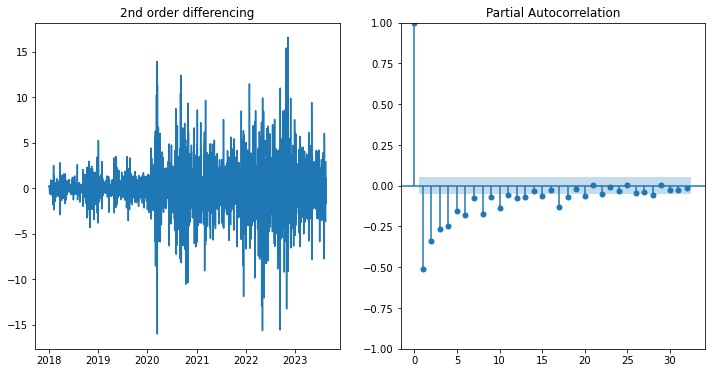

In [23]:
f = plt.figure(figsize=(12, 6))
ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df['Close'].diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df['Close'].diff().diff().dropna(), ax=ax2, method='ywm')
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['Close'], order=(1,1,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1417
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3118.250
Date:                Fri, 18 Aug 2023   AIC                           6242.500
Time:                        21:29:18   BIC                           6258.267
Sample:                             0   HQIC                          6248.391
                               - 1417                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4121      0.299      1.376      0.169      -0.175       0.999
ma.L1         -0.4610      0.294     -1.569      0.117      -1.037       0.115
sigma2         4.7895      0.110     43.506      0.0

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


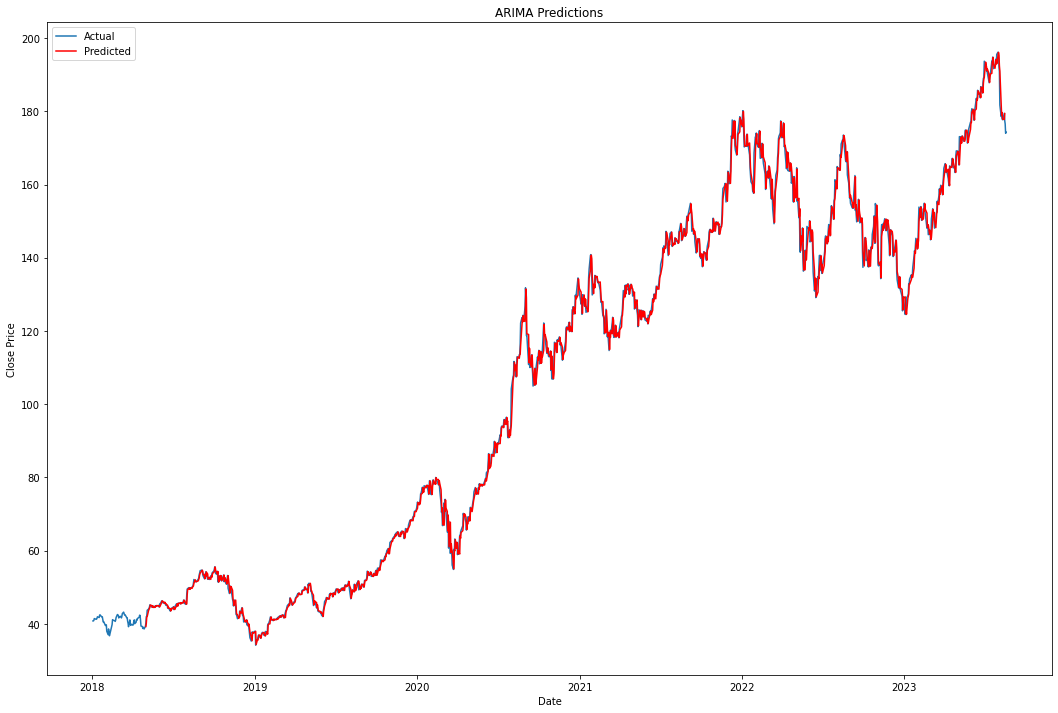

In [25]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['Close'], order=(1,1,1))
model = arima_model.fit()

# Get predictions and confidence intervals
pred = model.get_prediction(start='2018-05-01', end='2023-08-15', dynamic=False)
pred_conf = pred.conf_int()

# Plot actual and predicted values
plt.figure(figsize=(18, 12))
plt.plot(df['Close'], label='Actual')
plt.plot(pred.predicted_mean, label='Predicted', color='red')
# plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['Close'][:9000], order=(1,1,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1417
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3118.250
Date:                Fri, 18 Aug 2023   AIC                           6242.500
Time:                        21:29:20   BIC                           6258.267
Sample:                             0   HQIC                          6248.391
                               - 1417                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4121      0.299      1.376      0.169      -0.175       0.999
ma.L1         -0.4610      0.294     -1.569      0.117      -1.037       0.115
sigma2         4.7895      0.110     43.506      0.0

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


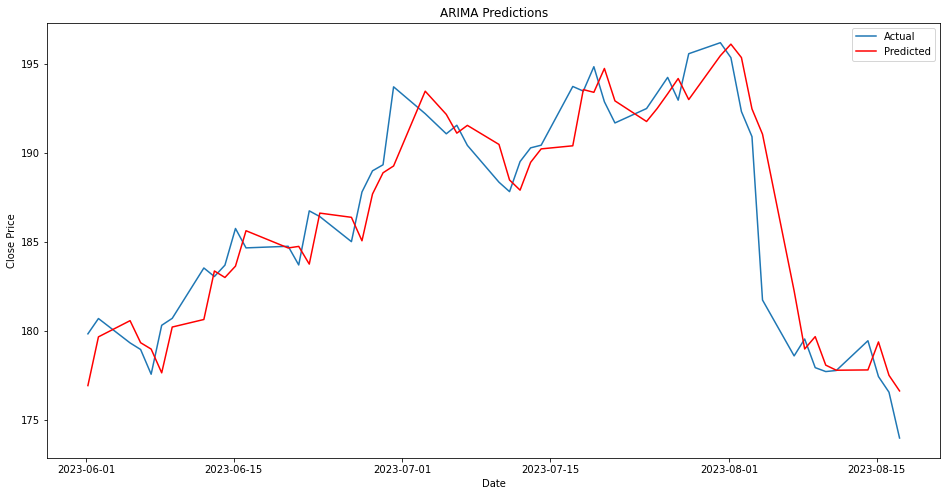

In [35]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['Close'][:7000], order=(1,1,1))
model = arima_model.fit()

# Get predictions and confidence intervals
pred = model.get_prediction(start='2023-06-01', end='2023-08-17', dynamic=False)
pred_conf = pred.conf_int()

# Plot actual and predicted values
plt.figure(figsize=(16, 8))
plt.plot(df['Close']['2023-06-01':'2023-08-17'], label='Actual')
plt.plot(pred.predicted_mean, label='Predicted', color='red')
# plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

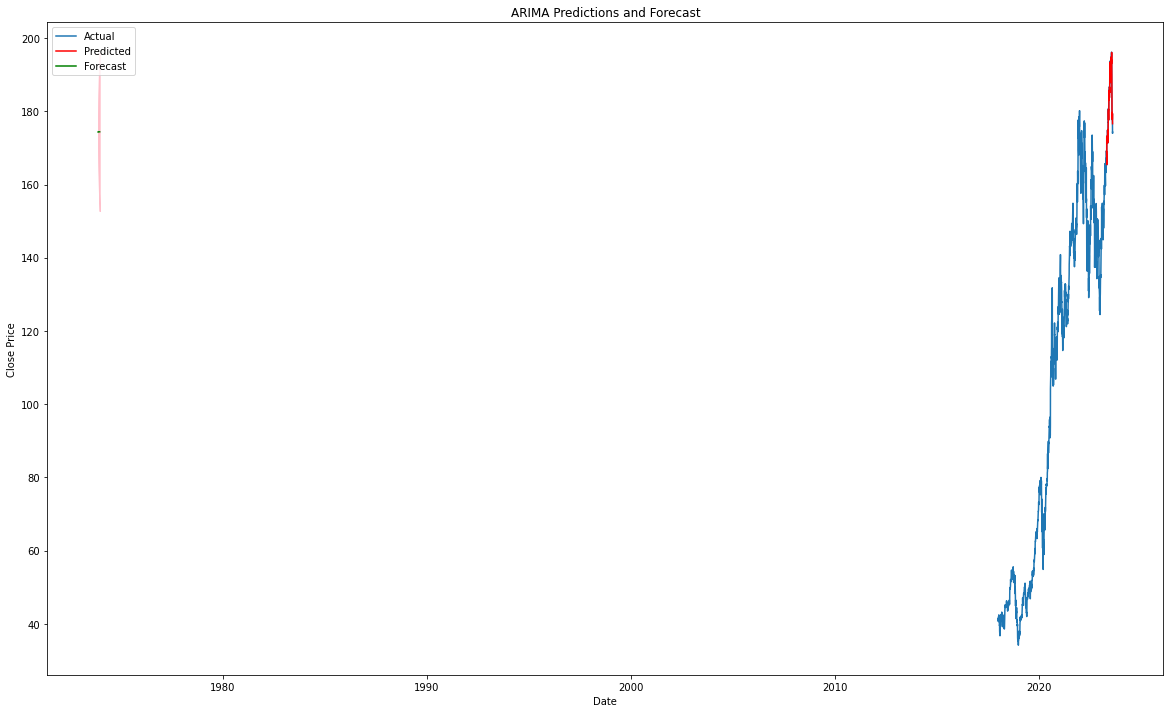

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# # Create a date range with a daily frequency
# date_range = pd.date_range(start=df.index[0], periods=len(df), freq='D')

# # Set the date range as the new index of the DataFrame
# df.index = date_range


# Fit the ARIMA model
arima_model = ARIMA(df['Close'], order=(1, 1, 1))
model = arima_model.fit()

# Get predictions and confidence intervals for the future period
forecast_period = 30  # Number of days for future prediction
forecast = model.get_forecast(steps=forecast_period)

# Get the predicted mean and confidence intervals for the future period
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot actual, predicted values, and forecasted values
plt.figure(figsize=(20, 12))
plt.plot(df['Close'], label='Actual')
plt.plot(pred.predicted_mean, label='Predicted', color='red')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Predictions and Forecast')
plt.legend()
plt.show()
